# 05_1.Independent Sample t-test
- https://pingouin-stats.org/build/html/generated/pingouin.ttest.html#pingouin.ttest

## 1.기본 package 설정

In [ ]:
# 그래프에서 한글 폰트 인식하기
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
!pip install pingouin

#  *** 런타임 다시 시작

In [1]:
# 1.기본
import numpy as np  # numpy 패키지 가져오기
import matplotlib.pyplot as plt # 시각화 패키지 가져오기
import seaborn as sns # 시각화

# 2.데이터 가져오기
import pandas as pd # csv -> dataframe으로 전환

# 3.통계분석 package
import pingouin as pg
from scipy import stats
import statsmodels.api as sm

In [2]:
# 기본세팅
# 테마 설정
sns.set_theme(style = "darkgrid")

# 한글 인식
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False # -인식

## 2.데이터 불러오기

### 2.1 데이터 프레임으로 저장
- 원본데이터(csv)를 dataframe 형태로 가져오기(pandas)

In [3]:
ist_df = pd.read_csv('https://raw.githubusercontent.com/leecho-bigdata/statistics-python/main/05_1.IST.csv', encoding="cp949")
ist_df.head()

,회사,수명1,수명2,수명3,수명4,수명5
0,1,50,52,51,50,51
1,1,52,54,53,52,53
2,2,51,51,51,51,51
3,2,52,52,52,52,52
4,1,52,54,53,50,53


### 2.2 범주형 변수 처리
- 가변수 처리시 문자로 처리를 해야 변수명 구분이 쉬움

In [4]:
ist_df['회사'].replace({1:'A타이어', 2:'B타이어',}, inplace=True)
ist_df['회사'] = ist_df['회사'].astype('category')

ist_df.head()

,회사,수명1,수명2,수명3,수명4,수명5
0,A타이어,50,52,51,50,51
1,A타이어,52,54,53,52,53
2,B타이어,51,51,51,51,51
3,B타이어,52,52,52,52,52
4,A타이어,52,54,53,50,53


### 2.3 자료구조 살펴보기

In [5]:
ist_df.shape

(66, 6)

In [6]:
ist_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   회사      66 non-null     category
 1   수명1     66 non-null     int64   
 2   수명2     66 non-null     int64   
 3   수명3     66 non-null     int64   
 4   수명4     66 non-null     int64   
 5   수명5     66 non-null     int64   
dtypes: category(1), int64(5)
memory usage: 2.9 KB


In [7]:
ist_df.columns

Index(['회사', '수명1', '수명2', '수명3', '수명4', '수명5'], dtype='object')

## 3.기술통계

In [8]:
# 그룹별 기술통계
ist_df.groupby('회사')["수명1"].describe().round(2)

<ipython-input-8-4008db54dbcf>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ist_df.groupby('회사')["수명1"].describe().round(2)


,count,mean,std,min,25%,50%,75%,max
회사,,,,,,,,
A타이어,31.0,48.94,3.33,42.0,47.0,49.0,51.0,56.0
B타이어,35.0,51.69,3.77,44.0,50.0,52.0,55.0,59.0


In [9]:
# 분석변수가 여러개 일 때
num_feature = ['수명1', '수명2', '수명3', '수명4', '수명5']
for num in num_feature:
    print("----", num, "----")
    results = ist_df.groupby('회사')[num].describe().round(2)
    print(results, "\n")

---- 수명1 ----


<ipython-input-9-1fde56c8bbe0>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  results = ist_df.groupby('회사')[num].describe().round(2)
<ipython-input-9-1fde56c8bbe0>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  results = ist_df.groupby('회사')[num].describe().round(2)


      count   mean   std   min   25%   50%   75%   max
회사                                                    
A타이어   31.0  48.94  3.33  42.0  47.0  49.0  51.0  56.0
B타이어   35.0  51.69  3.77  44.0  50.0  52.0  55.0  59.0 

---- 수명2 ----
      count   mean   std   min   25%   50%   75%   max
회사                                                    
A타이어   31.0  50.94  3.33  44.0  49.0  51.0  53.0  58.0
B타이어   35.0  51.69  3.77  44.0  50.0  52.0  55.0  59.0 

---- 수명3 ----
      count   mean   std   min   25%   50%   75%   max
회사                                                    
A타이어   31.0  50.03  3.19  42.0  48.0  50.0  52.0  57.0
B타이어   35.0  51.69  3.77  44.0  50.0  52.0  55.0  59.0 

---- 수명4 ----
      count   mean   std   min   25%   50%   75%   max
회사                                                    
A타이어   31.0  48.71  1.97  44.0  47.0  49.0  50.0  52.0
B타이어   35.0  51.69  3.77  44.0  50.0  52.0  55.0  59.0 

---- 수명5 ----
      count   mean   std   min   25%   50%   75%   max
회

<ipython-input-9-1fde56c8bbe0>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  results = ist_df.groupby('회사')[num].describe().round(2)
<ipython-input-9-1fde56c8bbe0>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  results = ist_df.groupby('회사')[num].describe().round(2)
<ipython-input-9-1fde56c8bbe0>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  results = ist_df.groupby('회사')[num].describe().round(2)


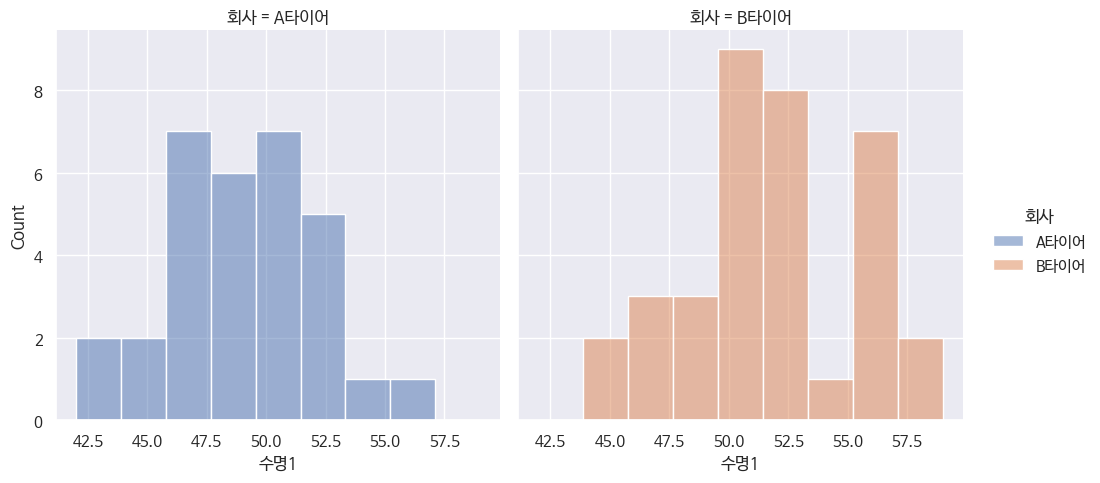

In [10]:
sns.displot(data = ist_df,
            x = "수명1",
            hue = "회사",
            col ="회사",
            kind = "hist")
plt.show()

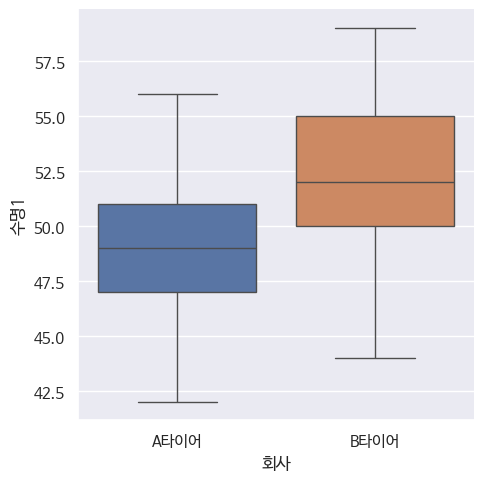

In [11]:
sns.catplot(data = ist_df,
            x = "회사",
            y = "수명1",
            hue = "회사",
            kind = "box")
plt.show()

## 4.등분산 검정

In [12]:
# p = 0.659, p >= 0.05 이므로 귀무가설(H0) 채택 -> 등분산
pg.homoscedasticity(ist_df,
                    dv = "수명1",
                    group = "회사").round(3)

,W,pval,equal_var
levene,0.196,0.659,True


In [13]:
num_feature = ['수명1', '수명2', '수명3', '수명4', '수명5']
for num in num_feature:
    print("----", num, "----")
    results = pg.homoscedasticity(ist_df,
                                  dv = num,
                                  group = "회사").round(3)
    print(results, "\n")

---- 수명1 ----
            W   pval  equal_var
levene  0.196  0.659       True 

---- 수명2 ----
            W   pval  equal_var
levene  0.196  0.659       True 

---- 수명3 ----
          W   pval  equal_var
levene  0.4  0.529       True 

---- 수명4 ----
           W  pval  equal_var
levene  7.02  0.01      False 

---- 수명5 ----
            W   pval  equal_var
levene  0.073  0.789       True 



## 5.t-test(등분산)

### 5.1 양측검정(two-sided)

In [14]:
# 차이있음

x = ist_df['수명1'][ist_df['회사'] == 'A타이어']
y = ist_df['수명1'][ist_df['회사'] == 'B타이어']

In [15]:
# p = 0.003, p < 0.05 이므로 귀무가설(H0) 기각 -> 차이있음
# paired = True : paired sample t-test
# correction = False : 등분산일때
pg.ttest(x, y,
         paired = False,
         alternative = "two-sided",
         correction = False).round(3)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-3.124,64,two-sided,0.003,"[-4.51, -0.99]",0.77,13.517,0.868


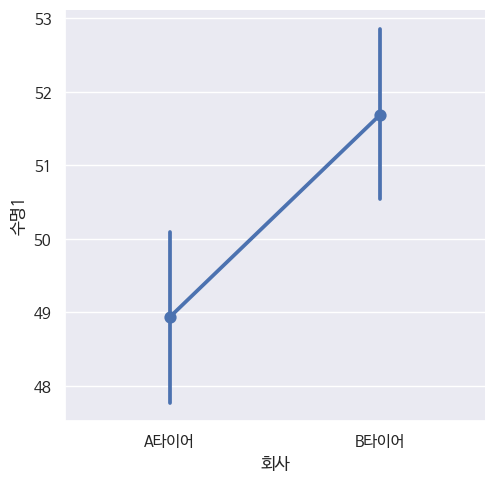

In [16]:
# 그래프
sns.catplot(x = "회사",
            y = "수명1",
            kind = "point",
            data = ist_df)
plt.show()

In [17]:
# 차이가 없음
# p = 0.397, p >= 0.05 이므로 귀무가설(H0) 채택 -> 차이없음

x = ist_df['수명2'][ist_df['회사'] == 'A타이어']
y = ist_df['수명2'][ist_df['회사'] == 'B타이어']

pg.ttest(x, y,
         paired = False,
         alternative = "two-sided",
         correction = False).round(3)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-0.852,64,two-sided,0.397,"[-2.51, 1.01]",0.21,0.344,0.134


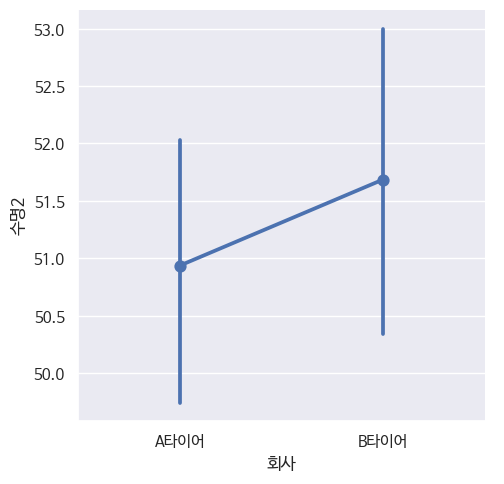

In [18]:
# 그래프
sns.catplot(x = "회사",
            y = "수명2",
            kind = "point",
            data = ist_df)
plt.show()

### 5.2 단측검정일 경우 (less)

In [19]:
# two-sided
# p = 0.061, p >= 0.05 이므로 귀무가설(H0) 채택 -> 차이없음
x = ist_df['수명3'][ist_df['회사'] == 'A타이어']
y = ist_df['수명3'][ist_df['회사'] == 'B타이어']

pg.ttest(x, y,
         paired = False,
         alternative = "two-sided",
         correction = False).round(3)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-1.91,64,two-sided,0.061,"[-3.38, 0.08]",0.471,1.166,0.469


In [20]:
# less
# p = 0.03 , p < 0.05 이므로 귀무가설(H0) 기각 -> A가 B보다 작다
pg.ttest(x, y,
         paired = False,
         alternative = "less",
         correction = False).round(3)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-1.91,64,less,0.03,"[-inf, -0.21]",0.471,2.333,0.597


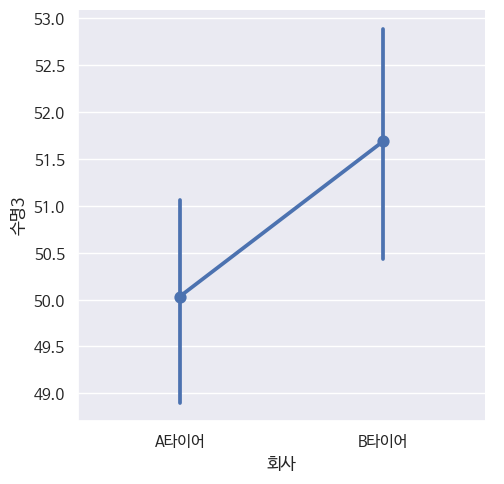

In [21]:
# 그래프
sns.catplot(x = "회사",
            y = "수명3",
            kind = "point",
            data = ist_df)
plt.show()

## 6.Welch t-test(이분산일때)

In [22]:
# p = 0.0101, p < 0.05 이므로 귀무가설(H0) 기각 -> 이분산
pg.homoscedasticity(ist_df,
                    dv = "수명4",
                    group = "회사")

,W,pval,equal_var
levene,7.02041,0.010141,False


In [23]:
x = ist_df['수명4'][ist_df['회사'] == 'A타이어']
y = ist_df['수명4'][ist_df['회사'] == 'B타이어']

In [24]:
# p = 0.000 , p < 0.05 이므로 귀무가설(H0) 기각 -> A가 B보다 작다
# correction = True : 이분산일때
pg.ttest(x, y,
         paired = False,
         alternative = "two-sided",
         correction = True).round(3) # 이분산일때

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-4.082,52.522,two-sided,0.0,"[-4.44, -1.51]",0.972,181.419,0.973


In [25]:
# correction = False : 등분산일때와 비교
pg.ttest(x, y,
         paired = False,
         alternative = "two-sided",
         correction = False).round(3)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-3.941,64,two-sided,0.0,"[-4.48, -1.47]",0.972,119.98,0.973


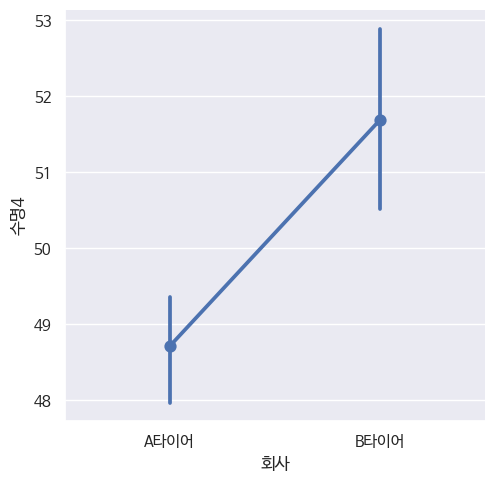

In [26]:
# 그래프
sns.catplot(x = "회사",
            y = "수명4",
            kind = "point",
            data = ist_df)
plt.show()

## 7.정규성 검정


### 7.1 정규분포 검정

In [27]:
# p = 0.705, p >= 0.05 이므로 귀무가설(H0) 채택 -> 정규분포
# p = 0.228, p >= 0.05 이므로 귀무가설(H0) 채택 -> 정규분포

pg.normality(ist_df,
             dv = '수명1',
             group = '회사')

,W,pval,normal
회사,,,
A타이어,0.976345,0.705453,True
B타이어,0.959988,0.228474,True


In [28]:
num_feature = ['수명1', '수명2', '수명3', '수명4', '수명5']
for num in num_feature:
    print("----", num, "----")
    results = pg.normality(ist_df,
                           dv = num,
                           group='회사')
    print(results, "\n")

---- 수명1 ----
             W      pval  normal
회사                              
A타이어  0.976345  0.705453    True
B타이어  0.959988  0.228474    True 

---- 수명2 ----
             W      pval  normal
회사                              
A타이어  0.976345  0.705453    True
B타이어  0.959988  0.228474    True 

---- 수명3 ----
             W      pval  normal
회사                              
A타이어  0.977802  0.749164    True
B타이어  0.959988  0.228474    True 

---- 수명4 ----
             W      pval  normal
회사                              
A타이어  0.930326  0.044750   False
B타이어  0.959988  0.228474    True 

---- 수명5 ----
             W      pval  normal
회사                              
A타이어  0.917587  0.020381   False
B타이어  0.914812  0.010135   False 



### 7.2 이상치제거(필요시)

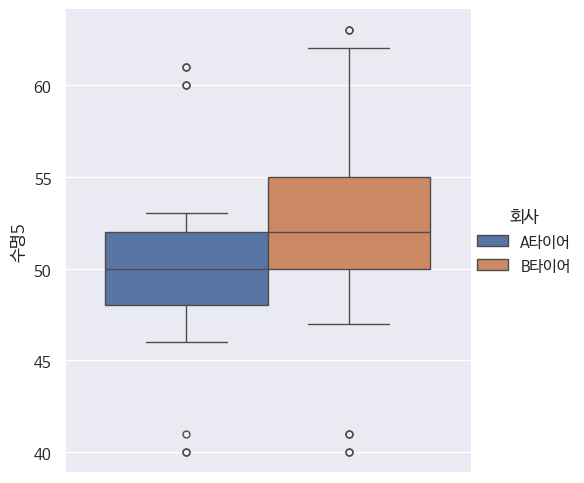

In [29]:
sns.catplot(data = ist_df,
            y = "수명5",
            hue = "회사",
            kind = "box")
plt.show()

In [30]:
# 이상치가 많아서 제거하지 않음
filter = ((ist_df["수명5"] >= 59) | (ist_df["수명5"] <= 46))
ist_df.loc[filter]

,회사,수명1,수명2,수명3,수명4,수명5
9,A타이어,44,46,46,46,41
10,A타이어,56,58,57,50,61
19,B타이어,44,44,44,44,40
21,A타이어,42,44,42,44,40
23,B타이어,58,58,58,58,63
25,A타이어,54,56,55,50,61
30,B타이어,59,59,59,59,63
36,B타이어,46,46,46,46,41
38,A타이어,45,47,46,46,46
41,B타이어,57,57,57,57,62


## 8.Mann–Whitney U test(비모수)

In [31]:
pg.normality(ist_df,
             dv = '수명5',
             group = '회사')

,W,pval,normal
회사,,,
A타이어,0.917587,0.020381,False
B타이어,0.914812,0.010135,False


In [32]:
x = ist_df['수명5'][ist_df['회사'] == 'A타이어']
y = ist_df['수명5'][ist_df['회사'] == 'B타이어']

In [33]:
# p = 0.165, p >= 0.05 이므로 귀무가설(H0) 채택 -> 차이없음
pg.mwu(x, y,
       alternative='two-sided').round(3)

,U-val,alternative,p-val,RBC,CLES
MWU,434.5,two-sided,0.165,0.199,0.4


In [34]:
# 모수통계(t-test)와 비교
pg.ttest(x, y,
         paired = False,
         alternative = "two-sided",
         correction = True).round(3)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-0.98,63.948,two-sided,0.331,"[-4.04, 1.38]",0.24,0.38,0.16


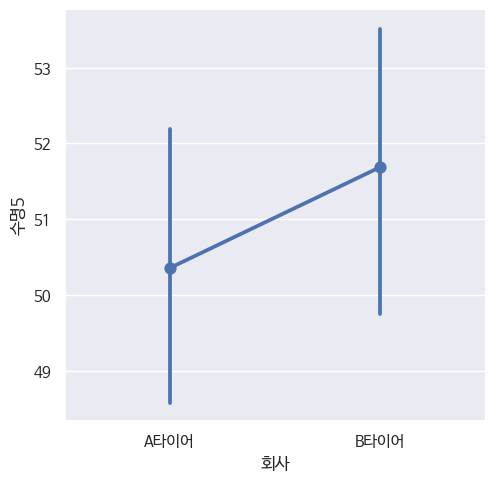

In [35]:
# 그래프
sns.catplot(x = "회사",
            y = "수명5",
            kind = "point",
            data = ist_df)
plt.show()

## 9.검증결과 그래프

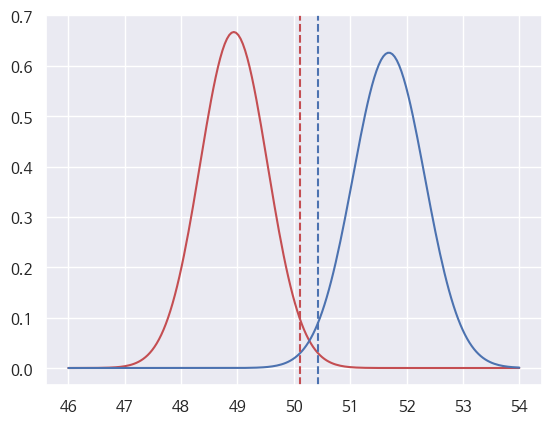

In [36]:
from scipy.stats import norm # 정규분포

x_data = np.linspace(46, 54, 200)

x1 = 48.935
x2 = 51.686
se1 = 3.33/np.sqrt(31) # 표준오차(표준편차/sqrt(n)))
se2 = 3.77/np.sqrt(35) # 표준오차(표준편차/sqrt(n)))

plt.plot(x_data, norm.pdf(x_data, loc = x1, scale = se1), 'r-')
plt.plot(x_data, norm.pdf(x_data, loc = x2, scale = se2), 'b-')
plt.axvline(x = x1+1.96 * se1, color='r', linestyle='--')
plt.axvline(x = x2-1.96 * se2, color='b', linestyle='--')
plt.show()

## 10.두모집단 비율검정(proportion)

In [37]:
# p = 0.0000004, p < 0.05이므로 귀무가설(H0) 기각 -> 차이가 있다.
from statsmodels.stats.proportion import proportions_ztest

count = np.array([87, 671])      # x1, x2
nobs = np.array([2065, 27949])   # n1, n2

z, p = proportions_ztest(count = count,
                         nobs = nobs,
                         value = 0)
print('z : {}, p : {}'.format(z, p))

z : 5.065085626514842, p : 4.0821681951628293e-07


In [38]:
# chi-square test로 분석한 결과
tab = [count, nobs]
result = sm.stats.Table(tab)
rslt = result.test_nominal_association()
print(rslt)

df          1
pvalue      9.507235974037798e-07
statistic   24.025416827475727


## 11.동등성검정

In [39]:
x = ist_df['수명1'][ist_df['회사'] == 'A타이어']
y = ist_df['수명1'][ist_df['회사'] == 'B타이어']

In [40]:
# p = 0.389, p >= 0.05 이므로 귀무가설(H0) 채택 -> 동등하지 않다
# D: difference(X), equivalence(X)
pg.tost(x, y,
        bound = 3,
        paired = False).round(3)

,bound,dof,pval
TOST,3,64,0.389


In [41]:
x = ist_df['수명2'][ist_df['회사'] == 'A타이어']
y = ist_df['수명2'][ist_df['회사'] == 'B타이어']

In [42]:
# p = 0.006, p < 0.05 이므로 귀무가설(H0) 기각 -> 동동하다
# D: difference(X), equivalence(X)
pg.tost(x, y,
        bound = 3,
        paired = False).round(3)

,bound,dof,pval
TOST,3,64,0.006
